In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

pd.set_option('display.float_format', lambda x: '%.2f' % x)

def calculate_returns(ticker, start_date, initial_investment=10000):
    # 使用 yfinance 下載股價資料
    data = yf.download(ticker, start=start_date)

    # 計算開始日期的交易日可以購買的股數
    first_day_price = data['Adj Close'][0]
    shares = initial_investment / first_day_price

    # 計算每年的價值
    data['Year'] = data.index.year
    yearly_values = data.groupby('Year')['Adj Close'].last() * shares

    # 計算報酬率並轉換為百分比
    returns = yearly_values.pct_change()
    returns[data.index.year[0]] = (yearly_values[data.index.year[0]] - initial_investment) / initial_investment
    returns = returns * 100

    tol_return = (yearly_values.tail(1).values[0] - initial_investment) / initial_investment * 100
    
    # 計算 CAGR
    years = len(yearly_values)
    cagr = (yearly_values.tail(1).values[0] / yearly_values.head(1).values[0]) ** (1 / years) - 1
    cagr = cagr * 100

    # 計算波動率
    volatility = np.std(returns) * np.sqrt(years)

    # 計算夏普比率
    risk_free_rate = 0.04  # 假設無風險利率為2%
    excess_returns = returns - risk_free_rate
    sharpe_ratio = excess_returns.mean() / excess_returns.std()

    # 將每年的價值、報酬率、CAGR、波動率和夏普比率存入一個 DataFrame
    result = pd.DataFrame({
        'Yearly Value': yearly_values,
        'Return Rate (%)': returns,
        'Total Return (%)': tol_return,
        'CAGR (%)': cagr,
        'Volatility': volatility,
        'Sharpe Ratio': sharpe_ratio
    })

    return result

In [31]:
# 使用函數
S0050 = calculate_returns('0050.TW', '2013-01-01')
S0056 = calculate_returns('0056.TW', '2013-01-01')
S006208 = calculate_returns('006208.TW', '2013-01-01')

[*********************100%%**********************]  1 of 1 completed
C:\Users\Hao\AppData\Local\Temp\ipykernel_26952\3661871135.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_day_price = data['Adj Close'][0]
[*********************100%%**********************]  1 of 1 completed
C:\Users\Hao\AppData\Local\Temp\ipykernel_26952\3661871135.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_day_price = data['Adj Close'][0]
[*********************100%%**********************]  1 of 1 completed
C:\Users\Hao\AppData\Local\Temp\ipykernel_26952\3661871135.py:12: FutureWarning: Series.__getitem__ treating keys a

In [32]:
S0050

,Yearly Value,Return Rate (%),Total Return (%),CAGR (%),Volatility,Sharpe Ratio
Year,,,,,,
2013,11044.44,10.44,310.33,11.56,55.86,0.81
2014,12884.89,16.66,310.33,11.56,55.86,0.81
2015,12075.64,-6.28,310.33,11.56,55.86,0.81
2016,14448.32,19.65,310.33,11.56,55.86,0.81
2017,17069.08,18.14,310.33,11.56,55.86,0.81
2018,16226.12,-4.94,310.33,11.56,55.86,0.81
2019,21665.30,33.52,310.33,11.56,55.86,0.81
2020,28411.67,31.14,310.33,11.56,55.86,0.81
2021,34640.44,21.92,310.33,11.56,55.86,0.81


In [33]:
S0056

,Yearly Value,Return Rate (%),Total Return (%),CAGR (%),Volatility,Sharpe Ratio
Year,,,,,,
2013,10414.01,4.14,220.26,9.81,61.05,0.62
2014,11385.99,9.33,220.26,9.81,61.05,0.62
2015,10772.97,-5.38,220.26,9.81,61.05,0.62
2016,11989.32,11.29,220.26,9.81,61.05,0.62
2017,13477.50,12.41,220.26,9.81,61.05,0.62
2018,13674.27,1.46,220.26,9.81,61.05,0.62
2019,17641.19,29.01,220.26,9.81,61.05,0.62
2020,19276.79,9.27,220.26,9.81,61.05,0.62
2021,22884.54,18.72,220.26,9.81,61.05,0.62


In [34]:
S006208

,Yearly Value,Return Rate (%),Total Return (%),CAGR (%),Volatility,Sharpe Ratio
Year,,,,,,
2013,10852.87,8.53,320.85,11.96,55.99,0.83
2014,12803.03,17.97,320.85,11.96,55.99,0.83
2015,12056.52,-5.83,320.85,11.96,55.99,0.83
2016,14129.88,17.20,320.85,11.96,55.99,0.83
2017,17156.26,21.42,320.85,11.96,55.99,0.83
2018,16220.84,-5.45,320.85,11.96,55.99,0.83
2019,21670.04,33.59,320.85,11.96,55.99,0.83
2020,28542.08,31.71,320.85,11.96,55.99,0.83
2021,34818.74,21.99,320.85,11.96,55.99,0.83


In [35]:
import matplotlib.pyplot as plt

def plot_data(result, ticker):
    # 繪製價值的圖表
    plt.figure(figsize=(12, 6))
    plt.plot(result['Yearly Value'])
    plt.title(f'Yearly Value of {ticker}')
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.ticklabel_format(style='plain', axis='y')
    plt.show()

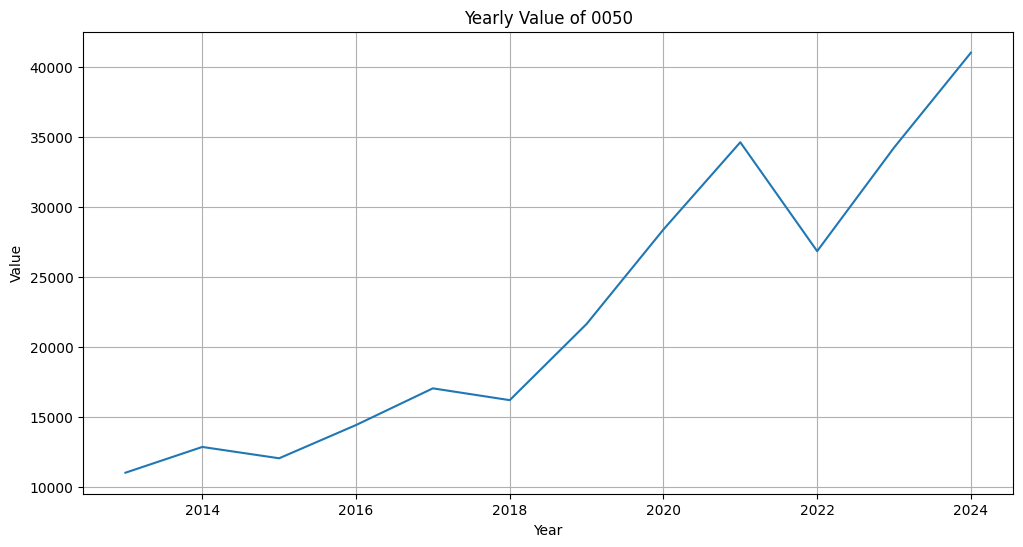

In [36]:
plot_data(S0050, '0050')

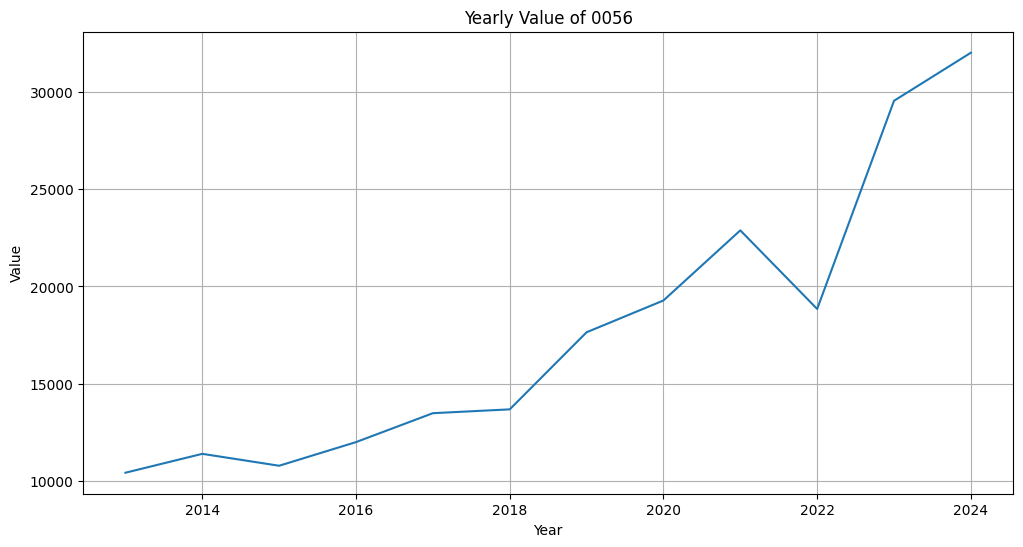

In [37]:
plot_data(S0056, '0056')

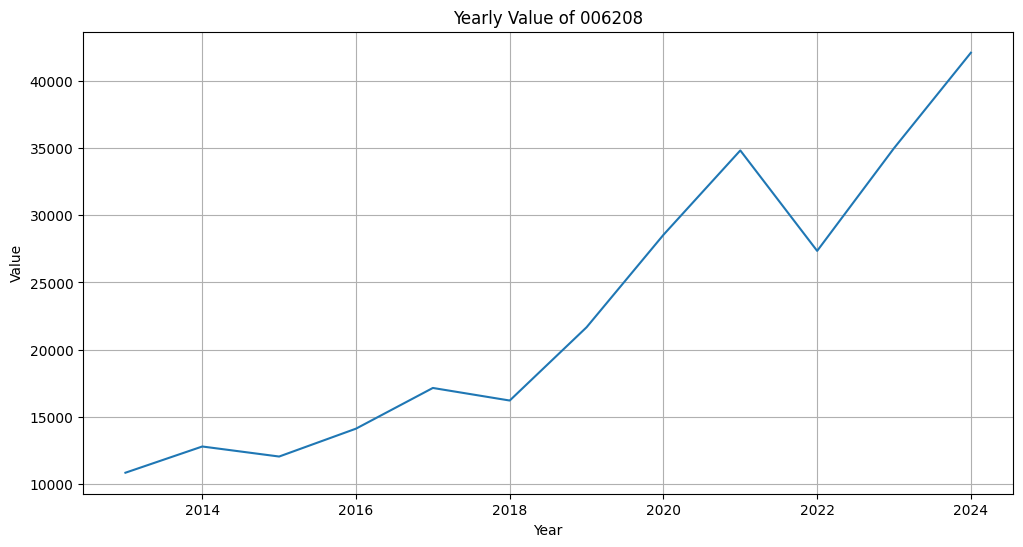

In [38]:
plot_data(S006208, '006208')

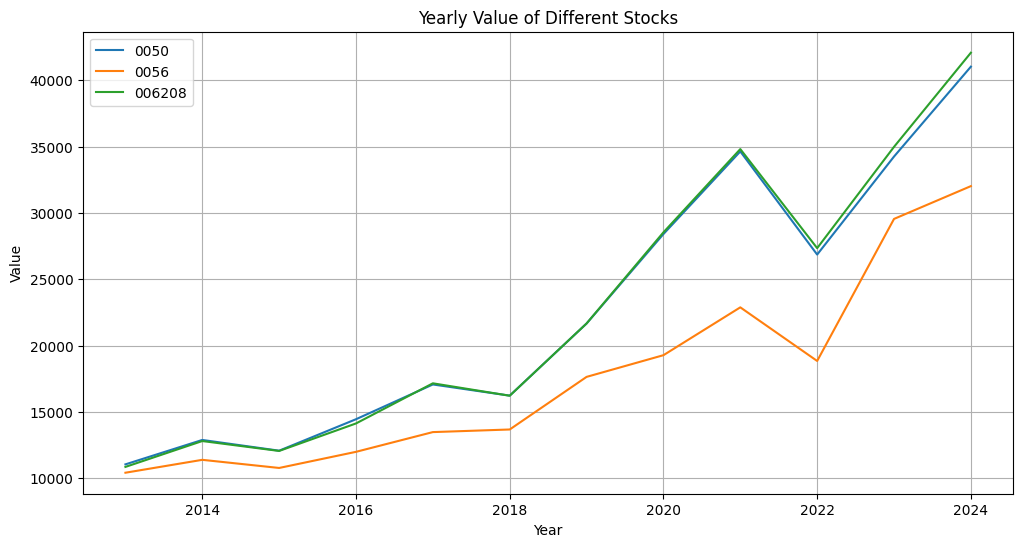

In [39]:
# 繪製所有股票的年度價值
plt.figure(figsize=(12, 6))
plt.plot(S0050['Yearly Value'], label='0050')
plt.plot(S0056['Yearly Value'], label='0056')
plt.plot(S006208['Yearly Value'], label='006208')
plt.title('Yearly Value of Different Stocks')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
# 使用函數
T0050 = calculate_returns('0050.TW', '2008-01-01')
T0056 = calculate_returns('0056.TW', '2008-01-01')

[*********************100%%**********************]  1 of 1 completed
C:\Users\Hao\AppData\Local\Temp\ipykernel_26952\3661871135.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_day_price = data['Adj Close'][0]
[*********************100%%**********************]  1 of 1 completed
C:\Users\Hao\AppData\Local\Temp\ipykernel_26952\3661871135.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  first_day_price = data['Adj Close'][0]


In [41]:
T0050

,Yearly Value,Return Rate (%),Total Return (%),CAGR (%),Volatility,Sharpe Ratio
Year,,,,,,
2008,5515.75,-44.84,271.97,11.88,103.83,0.43
2009,9406.77,70.54,271.97,11.88,103.83,0.43
2010,10231.63,8.77,271.97,11.88,103.83,0.43
2011,8300.28,-18.88,271.97,11.88,103.83,0.43
2012,8965.17,8.01,271.97,11.88,103.83,0.43
2013,10011.96,11.68,271.97,11.88,103.83,0.43
2014,11680.36,16.66,271.97,11.88,103.83,0.43
2015,10946.76,-6.28,271.97,11.88,103.83,0.43
2016,13097.62,19.65,271.97,11.88,103.83,0.43


In [42]:
T0056

,Yearly Value,Return Rate (%),Total Return (%),CAGR (%),Volatility,Sharpe Ratio
Year,,,,,,
2008,5319.07,-46.81,185.99,10.40,108.48,0.35
2009,9105.06,71.18,185.99,10.40,108.48,0.35
2010,10824.90,18.89,185.99,10.40,108.48,0.35
2011,8614.78,-20.42,185.99,10.40,108.48,0.35
2012,8863.81,2.89,185.99,10.40,108.48,0.35
2013,9299.67,4.92,185.99,10.40,108.48,0.35
2014,10167.64,9.33,185.99,10.40,108.48,0.35
2015,9620.22,-5.38,185.99,10.40,108.48,0.35
2016,10706.42,11.29,185.99,10.40,108.48,0.35


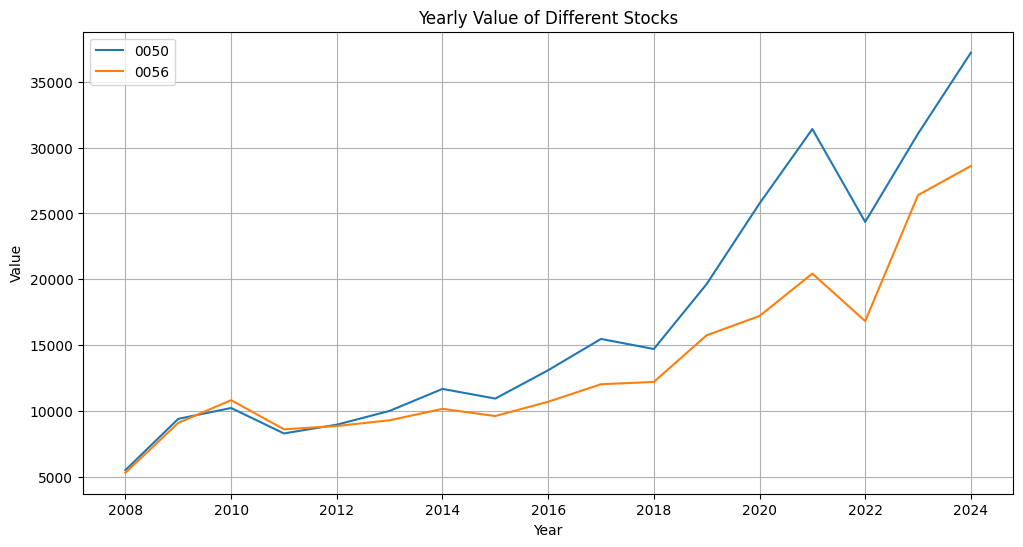

In [43]:
# 繪製所有股票的年度價值
plt.figure(figsize=(12, 6))
plt.plot(T0050['Yearly Value'], label='0050')
plt.plot(T0056['Yearly Value'], label='0056')
plt.title('Yearly Value of Different Stocks')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()